# Lista 4 Séries Temporais
Humberto Seghetto dos Santos - 1810232

Pedro Thiago Marmello - 1612702

In [1]:
## Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import statsmodels.api as sm
import numpy as np
import yfinance as yf
# from IPython.display import clear_output
from scipy.stats import skew, kurtosis

In [2]:
!pip install arch
import arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 5.3 MB/s eta 0:00:00


#Tarefa 1: Series de retorno e fatos estilizados

## Item 1:

In [3]:
df_original = yf.download(["AAPL"],"2015-12-01","2023-12-01")
df_original["Adj Close"].dropna(inplace= True)

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Obtendo a série de retornos
## arit
retornos = df_original['Adj Close'].pct_change()[1:]*100
## Log
log_retornos = np.log(df_original['Adj Close']).diff()[1:]*100
retornos,log_retornos

(Date
 2015-12-02   -0.903353
 2015-12-03   -0.928770
 2015-12-04    3.324634
 2015-12-07   -0.630091
 2015-12-08   -0.042284
                 ...   
 2023-11-24   -0.700432
 2023-11-27   -0.094756
 2023-11-28    0.321408
 2023-11-29   -0.540966
 2023-11-30    0.306280
 Name: Adj Close, Length: 2013, dtype: float64,
 Date
 2015-12-02   -0.907458
 2015-12-03   -0.933110
 2015-12-04    3.270563
 2015-12-07   -0.632085
 2015-12-08   -0.042293
                 ...   
 2023-11-24   -0.702896
 2023-11-27   -0.094801
 2023-11-28    0.320893
 2023-11-29   -0.542434
 2023-11-30    0.305812
 Name: Adj Close, Length: 2013, dtype: float64)

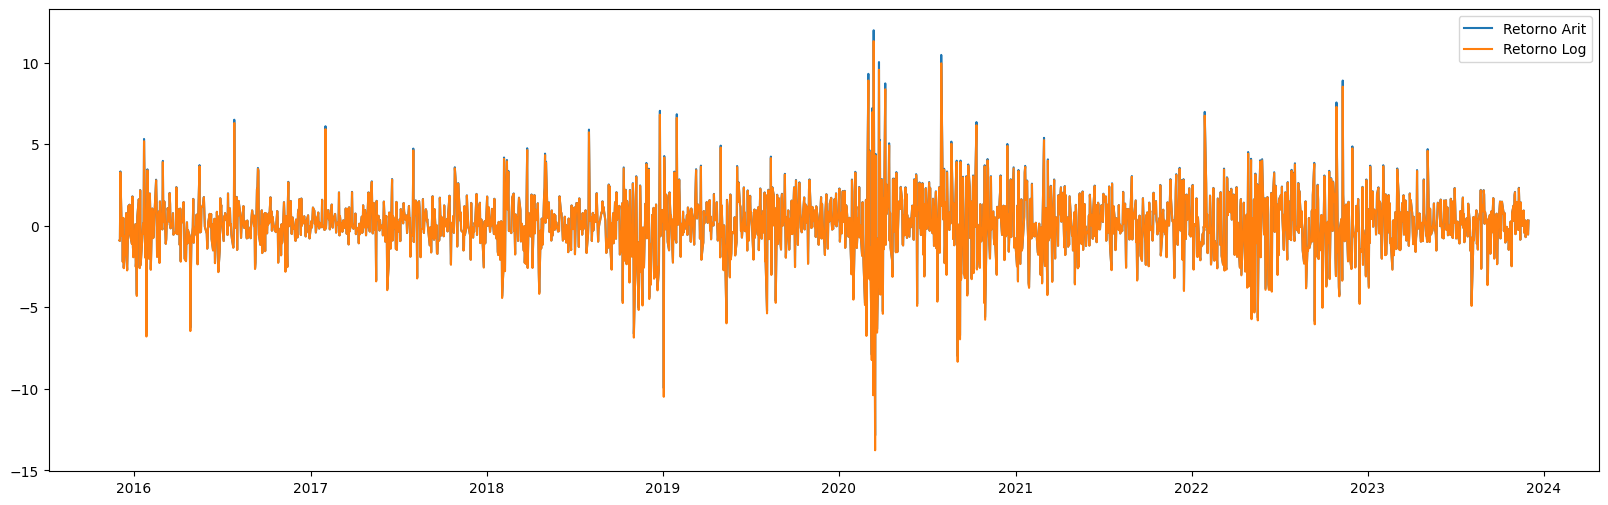

In [5]:
plt.figure(figsize=(20,6))
plt.plot(retornos.index, retornos.values,label = "Retorno Arit")
plt.plot(log_retornos.index, log_retornos.values, label = "Retorno Log")
plt.legend()
plt.show()

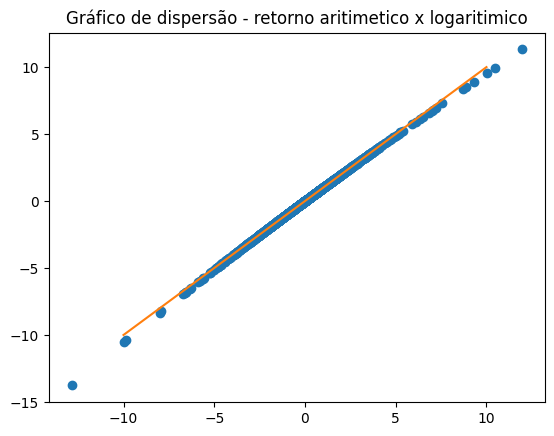

In [6]:
# Diagrama de Dispersão
plt.scatter(retornos,log_retornos)
plt.plot([-10,10],[-10,10],c="tab:orange")
plt.title("Gráfico de dispersão - retorno aritimetico x logaritimico")
plt.show()

Observamos pelos dois gráficos acima que as series de retorno e retorno logaritimo se mantém juntas em maior parte dos pontos, ocorrendo um pequeno descolamento apenas nos dias de retornos absolutos mais altos.

Matematicamente, esse descolamento ocorre devido ao efeito da função logaritimica, que diminui o valor absoluto do retorno para os dias com grandes ganhos e aumenta o valor absoluto do retorno nos dias com grandes perdas.  

Entretanto, como mesmo nos dias mais volateis os retornos não ultrapassam uma variação de 15%, não ocorre um descolamento muito pronunciado. Economicamente, isso se deve a Apple ser uma empresa muito grande e não apresentar variações maiores, demonstrando certa resiliencia aos choques de mercado.

Contudo, ainda é perceptivel o impacto da pandemia durante o ano de 2020, bem como choques eventuais nos finais de 2019 e 2022.

Date
2015-12-02     0.816047
2015-12-03     0.862613
2015-12-04    11.053189
2015-12-07     0.397015
2015-12-08     0.001788
                ...    
2023-11-24     0.490605
2023-11-27     0.008979
2023-11-28     0.103303
2023-11-29     0.292644
2023-11-30     0.093807
Name: Adj Close, Length: 2013, dtype: float64

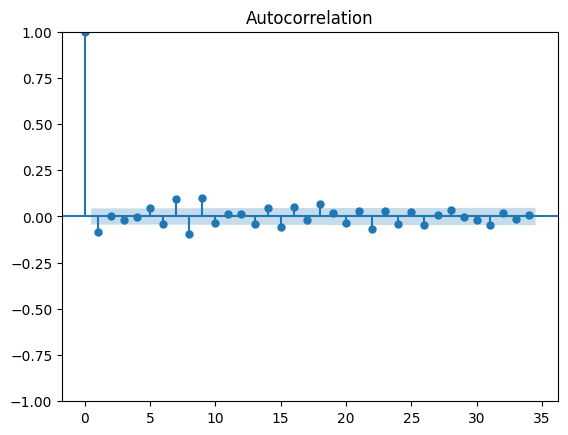

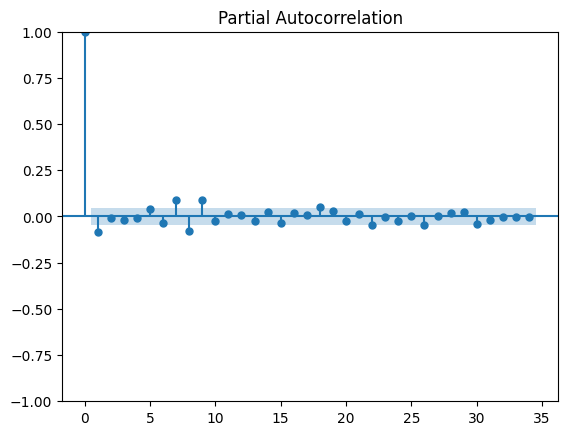

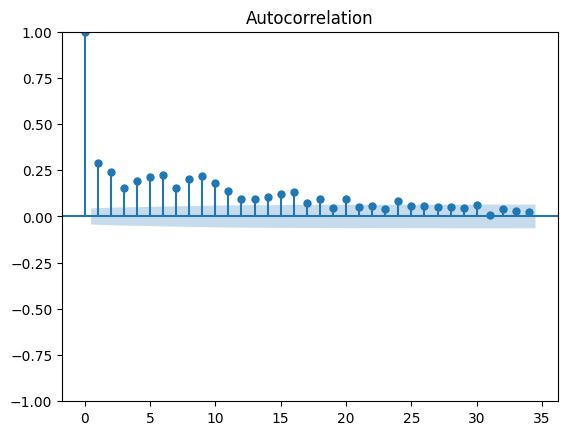

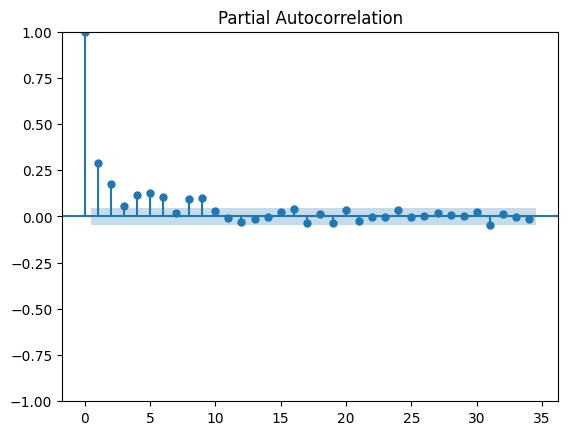

In [7]:
sm.graphics.tsa.plot_acf(retornos)
sm.graphics.tsa.plot_pacf(retornos)

retornos_q = retornos**2
sm.graphics.tsa.plot_acf(retornos_q)
sm.graphics.tsa.plot_pacf(retornos_q)
retornos_q

(array([  1.,   0.,   2.,   2.,   1.,  10.,  20.,  58., 150., 408., 755.,
        398., 130.,  51.,  12.,   6.,   3.,   3.,   2.,   1.]),
 array([-12.8647058 , -11.62242778, -10.38014976,  -9.13787174,
         -7.89559372,  -6.6533157 ,  -5.41103768,  -4.16875966,
         -2.92648164,  -1.68420362,  -0.4419256 ,   0.80035242,
          2.04263044,   3.28490846,   4.52718648,   5.76946449,
          7.01174251,   8.25402053,   9.49629855,  10.73857657,
         11.98085459]),
 <BarContainer object of 20 artists>)

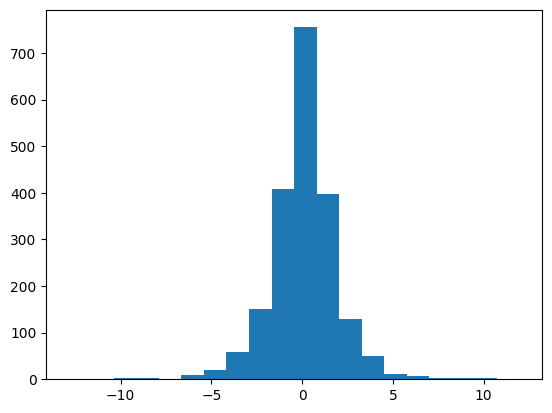

In [8]:
plt.hist(retornos,bins=20)

(array([  1.,   0.,   2.,   0.,   2.,   6.,  10.,  32.,  87., 196., 620.,
        639., 287.,  88.,  25.,   7.,   5.,   2.,   3.,   1.]),
 array([-13.77081695, -12.51648746, -11.26215796, -10.00782846,
         -8.75349897,  -7.49916947,  -6.24483998,  -4.99051048,
         -3.73618099,  -2.48185149,  -1.227522  ,   0.0268075 ,
          1.28113699,   2.53546649,   3.78979598,   5.04412548,
          6.29845497,   7.55278447,   8.80711397,  10.06144346,
         11.31577296]),
 <BarContainer object of 20 artists>)

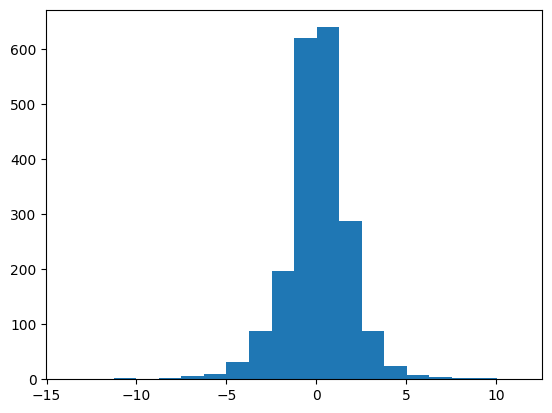

In [9]:
plt.hist(log_retornos,bins=20)

In [10]:
import scipy
scipy.stats.kurtosis(retornos,fisher = False),scipy.stats.skew(retornos)

(8.480639246365525, -0.02624099171684341)

##Item 2:

In [11]:
### Pegando um pedaço da série para definir um segmento Sample e dividí-lo em baixa volatilidade e alta volatilidade. Criamos isso pois a série possui diversos momentos de alta e baixa volatilidade
index1 = np.hstack([np.arange(780,1050)])
baixa_volatilidade = retornos[index1]
index2 = np.hstack([np.arange(1050,1330)])
alta_volatilidade = retornos[index2]

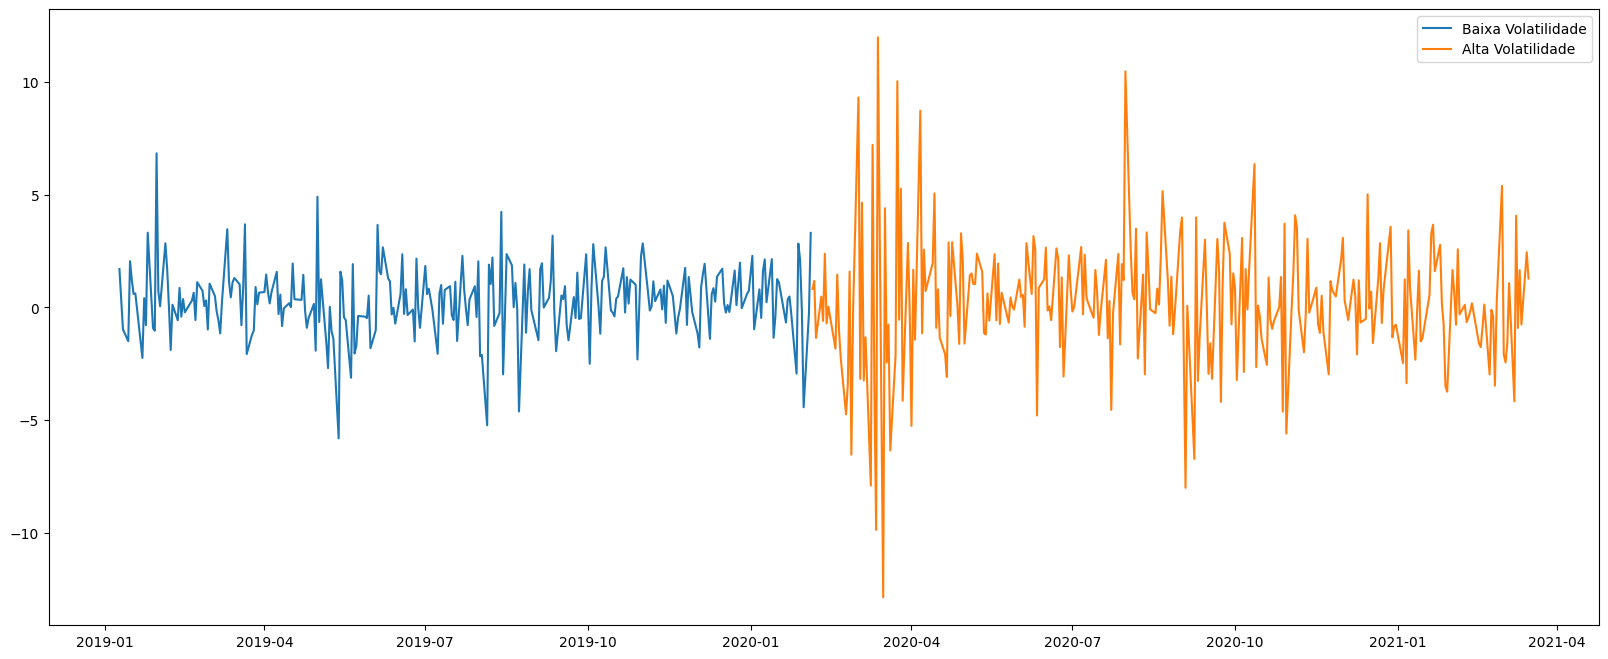

In [12]:
plt.figure(figsize=(20,8))
plt.plot(baixa_volatilidade, label="Baixa Volatilidade")
plt.plot(alta_volatilidade, label="Alta Volatilidade")
plt.legend()
plt.show()

### Alta Volatilidade

In [13]:
dec_a = alta_volatilidade.describe()
curtose_a = alta_volatilidade.kurtosis() + 3 #Ajustando a Curtose de Fisher
quantis_a = alta_volatilidade.quantile([0.005, 0.01, 0.05, 0.5, 0.95, 0.99, 0.995])
## Calcular o desvio padrão
## np.std(alta_volatilidade)
assimetria_a = skew(alta_volatilidade)

Valor p: 1.0636163130249693e-05


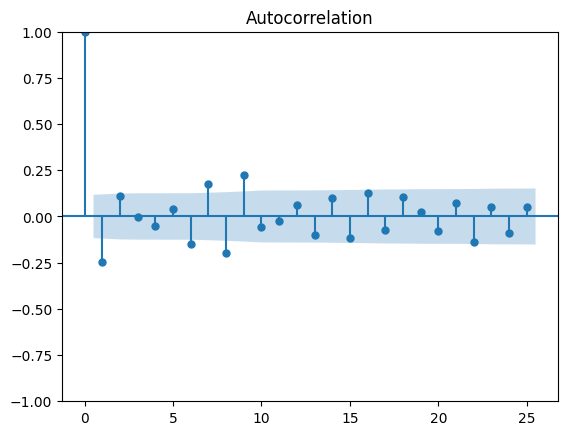

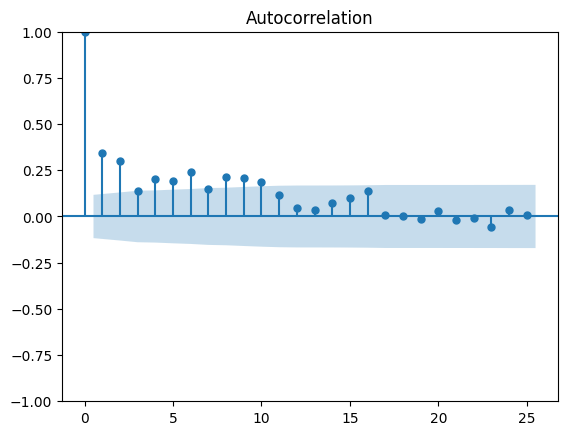

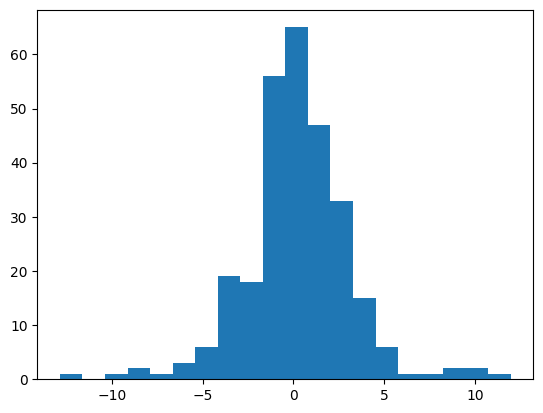

In [14]:
# teste de estacionariedade da série;
from statsmodels.tsa.stattools import adfuller
resultado_adf = adfuller(alta_volatilidade)
print('Valor p:', resultado_adf[1])
p_adf_a = resultado_adf[1]
# FAC e teste de dependência linear da série;
sm.graphics.tsa.plot_acf(alta_volatilidade)
plt.show()

# FAC do quadrado e teste de dependência não linear;
sm.graphics.tsa.plot_acf(alta_volatilidade**2)
plt.show()

# histograma, q-q plot e teste de normalidade;
plt.hist(alta_volatilidade,bins=20)
plt.show()

<Figure size 800x600 with 0 Axes>

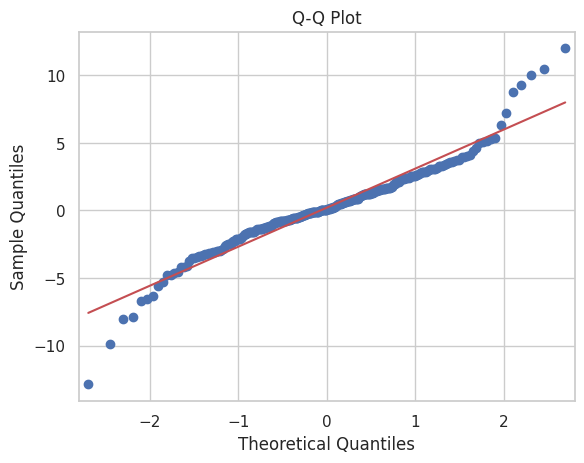

In [15]:
#q-q plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sm.qqplot(alta_volatilidade, line='s')
plt.title('Q-Q Plot')
plt.show()

### Baixa Volatilidade

In [16]:
dec_b = baixa_volatilidade.describe()
curtose_b = baixa_volatilidade.kurtosis() + 3 #Ajustando a Curtose de Fisher
quantis_b = baixa_volatilidade.quantile([0.005, 0.01, 0.05, 0.5, 0.95, 0.99, 0.995])
## Calcular o desvio padrão
## np.std(baixa_volatilidade)
assimetria_b = skew(baixa_volatilidade)

Valor p: 2.6059955457597186e-25


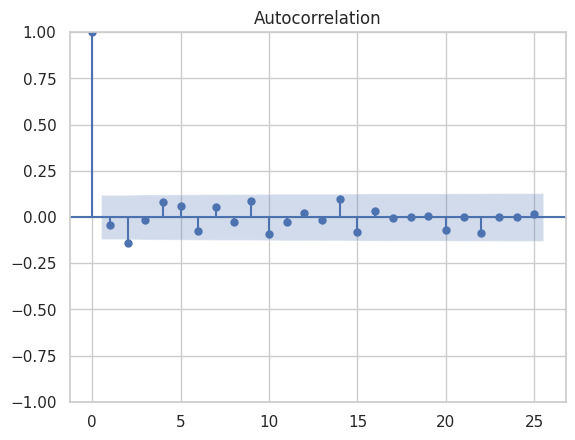

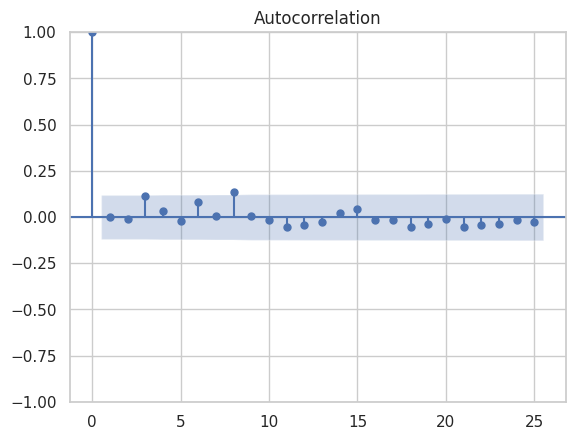

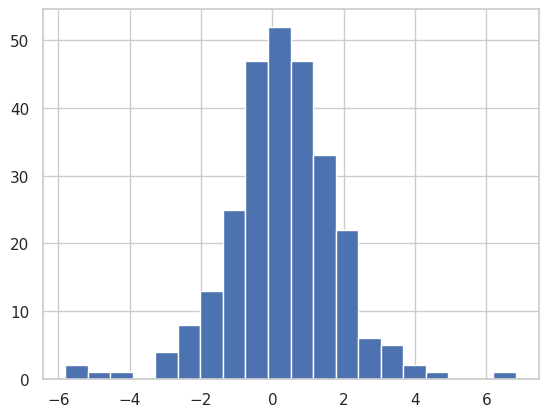

In [17]:
# teste de estacionariedade da série;
from statsmodels.tsa.stattools import adfuller
resultado_adf = adfuller(baixa_volatilidade)
print('Valor p:', resultado_adf[1])

p_adf_b = resultado_adf[1]
# FAC e teste de dependência linear da série;
sm.graphics.tsa.plot_acf(baixa_volatilidade)
plt.show()

# FAC do quadrado e teste de dependência não linear;
sm.graphics.tsa.plot_acf(baixa_volatilidade**2)
plt.show()

# histograma, q-q plot e teste de normalidade;
plt.hist(baixa_volatilidade,bins=20)
plt.show()

<Figure size 800x600 with 0 Axes>

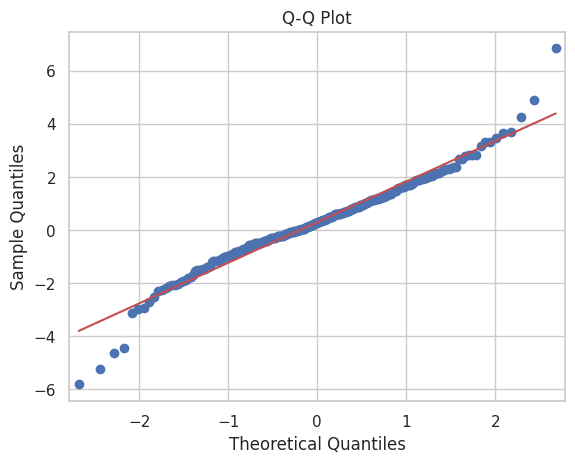

In [18]:
#q-q plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sm.qqplot(baixa_volatilidade, line='s')
plt.title('Q-Q Plot')
plt.show()

In [19]:
dados = {
    'Média':[dec_a[1], dec_b[1]],
    'Mín':[dec_a[3],dec_a[3]],
    'Max':[dec_a[7],dec_a[7]],
    'Quantis':[quantis_a, quantis_b],
    'Desvio P':[dec_a[2],dec_a[2]],
    'Assimetria':[assimetria_a, assimetria_b],
    'Curtose':[curtose_a, curtose_b],
}
tabela_volatilidade = pd.DataFrame(dados, index=["Alta Volatilidade", "Baixa Volatilidade"])

In [20]:
tabela_volatilidade

,Média,Mín,Max,Quantis,Desvio P,Assimetria,Curtose
Alta Volatilidade,0.207845,-12.864706,11.980855,0.005 -9.137074 0.010 -7.929587 0.050 ...,2.89645,0.013198,6.532825
Baixa Volatilidade,0.295023,-12.864706,11.980855,0.005 -5.023391 0.010 -4.492208 0.050 -2...,2.89645,-0.151674,5.589744


### Interpretação:

Como foi possível observar pelo teste ADF realizado, ambas são estacionárias. O que pudemos observar pelo gráfico qq-plot é que ambas possuem um excesso de curtose, por isso acabam fugindo nas pontas da reta normal. Isso é possível observar pelos valores altos de curtose 6 e 5 na tabela.




#Tarefa 2: Modelos GARCH

## Item 1:

In [21]:
def describe_dict(d):
    # Esta função recebe um dicionário como entrada e retorna uma string
    # contendo os itens do dicionário formatados como pares chave-valor.

    # Por exemplo, se o dicionário for: {'alpha': 0.01, 'solver': 'auto'}
    # a função retornará: 'alpha=0.01, solver=auto'

    return ", ".join([f"{key}={value}" for key, value in d.items()])

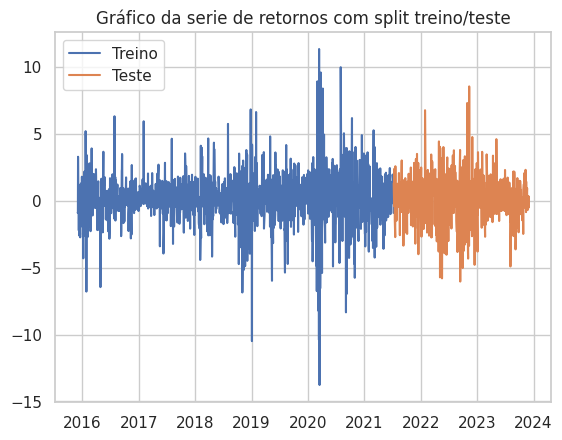

In [22]:
index = int(len(log_retornos)*7/10)

plt.plot(log_retornos[:index], label = "Treino")
plt.plot(log_retornos[index:], label = "Teste")
plt.title("Gráfico da serie de retornos com split treino/teste")
plt.legend()
plt.show()

In [23]:
ModelsDF = pd.DataFrame()
for p in [1,2]:
    for q in [1,2]:
        garch = arch.arch_model(log_retornos, vol='GARCH', p=p, q=q, dist = "normal", rescale = 0)
        garch_fit = garch.fit(disp='off', last_obs=index)

        ModelsDF = pd.concat([ModelsDF,pd.DataFrame({
            "p":p,
            "q":q,
            "erro":"normal",
            "aic":garch_fit.aic,
            "valores":describe_dict(garch_fit.tvalues)
        },index=[0])], axis=0, ignore_index=True)

        garch = arch.arch_model(log_retornos, vol='GARCH', p=p, q=q, dist = "studentst", rescale = 0)
        garch_fit = garch.fit(disp='off', last_obs=index)

        ModelsDF = pd.concat([ModelsDF,pd.DataFrame({
            "p":p,
            "q":q,
            "erro":"student",
            "aic":garch_fit.aic,
            "valores":describe_dict(garch_fit.tvalues)
        },index=[0])], axis=0, ignore_index=True)

In [24]:
ModelsDF

,p,q,erro,aic,valores
0,1,1,normal,5392.238381,"mu=4.992312612758856, omega=3.2973946121846907..."
1,1,1,student,5231.980037,"mu=5.100106357168244, omega=2.707440884061121,..."
2,1,2,normal,5394.238381,"mu=4.750795681286594, omega=2.218624565950321,..."
3,1,2,student,5233.980037,"mu=5.094277382791874, omega=2.7375449211308633..."
4,2,1,normal,5386.592495,"mu=5.079994351822129, omega=3.203789411260436,..."
5,2,1,student,5233.849804,"mu=5.096798716814539, omega=2.302180908612679,..."
6,2,2,normal,5388.592495,"mu=5.089594036490915, omega=1.0826327892091254..."
7,2,2,student,5235.484179,"mu=5.093508502681589, omega=2.6520142354702285..."


Uma vez que o modelo GARCH demonstra exxcelente performance para as mais variadas séries mesmo com termos p e q pequenos, sendo o GARCH(1,1) o mais utilizado, foram considerados apenas as combinações de p = {1,2} e q={1,2} para ambos os modelos.

A escolha de p e q foi feita com baso no modelo que obtivesse o menor AIC, sendo estes GARCH(1,1) para a distribuição student e GARCH(2,1) para a distribuição normal.

## Item 2:

In [25]:
garch = arch.arch_model(log_retornos, vol='GARCH', p=2, q=1, dist = "normal", rescale = 0)
garch_normal = garch.fit(disp='off', last_obs=index)
print(garch_normal.summary())

print("")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("")

garch = arch.arch_model(log_retornos, vol='GARCH', p=1, q=1, dist = "studentst", rescale = 0)
garch_student = garch.fit(disp='off', last_obs=index)
print(garch_student.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2688.30
Distribution:                  Normal   AIC:                           5386.59
Method:            Maximum Likelihood   BIC:                           5412.85
                                        No. Observations:                 1409
Date:                Sun, Dec 10 2023   Df Residuals:                     1408
Time:                        19:43:53   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2141  4.215e-02      5.080  3.774e-07 [  0.131,  0.29

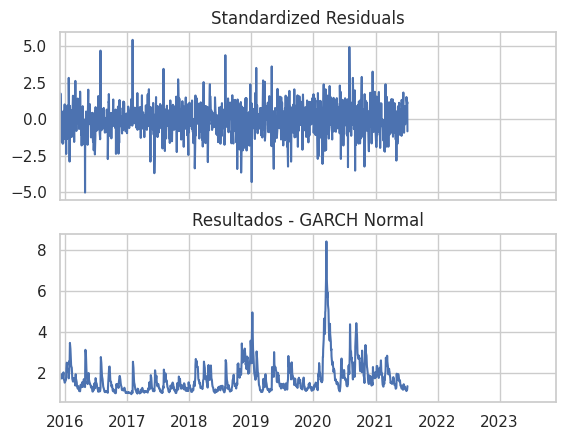

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


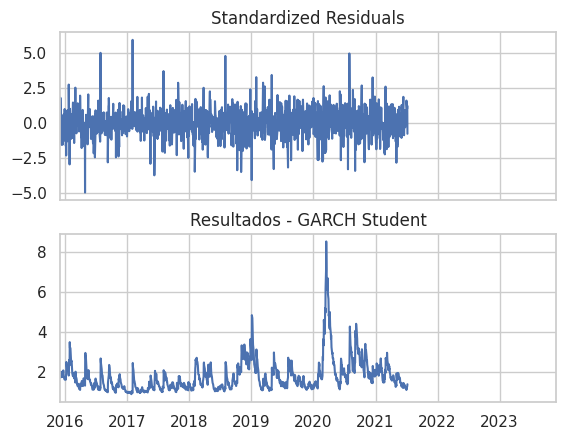

In [26]:
garch_normal.plot()
plt.title("Resultados - GARCH Normal")
plt.show()
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
garch_student.plot()
plt.title("Resultados - GARCH Student")
plt.show()

### FAC dos residuos

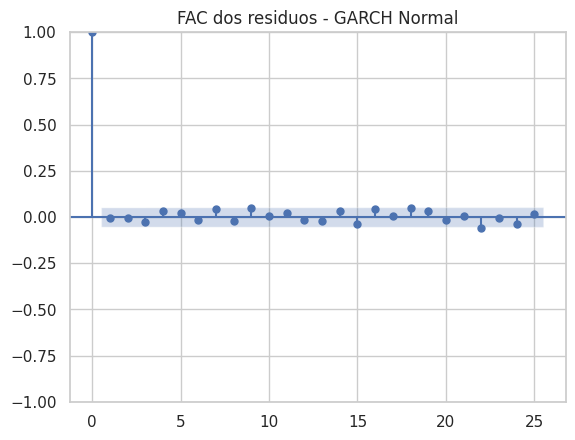

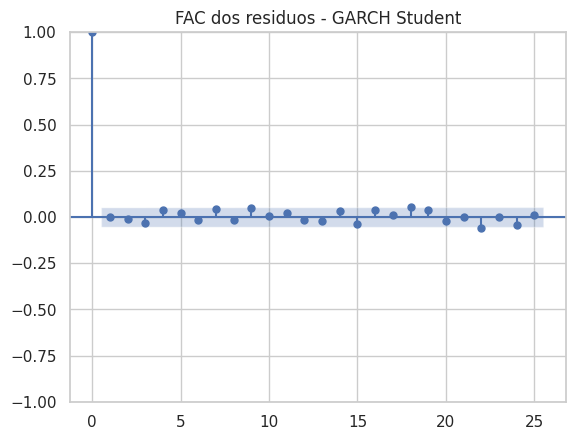

In [27]:
## FAC
resids_normal = garch_normal.std_resid.dropna().to_numpy()
resids_student = garch_student.std_resid.dropna().to_numpy()

## Autocorrelação deve ser nula
sm.graphics.tsa.plot_acf(resids_normal, lags = 25)
plt.title("FAC dos residuos - GARCH Normal")
print("")

sm.graphics.tsa.plot_acf(resids_student, lags = 25)
plt.title("FAC dos residuos - GARCH Student")
print("")


Conforme o esperado, a FAC dos residuos é descorrelatada para ambos os modelos em todos os lags testados, indicando que a hipotese inicial de correlação nula é verdadeira.

### FAC dos residuos quadrados

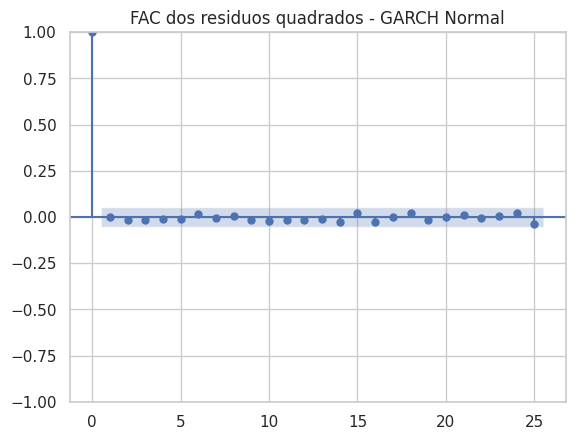

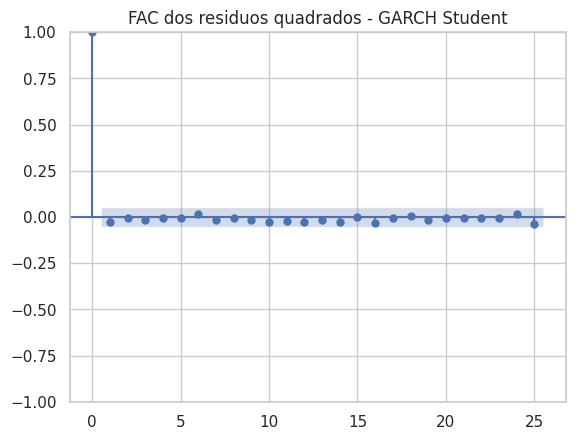

In [28]:
## FAC do quadrado
resids_normal2 = resids_normal**2
resids_student2 = resids_student**2

## Autocorrelação deve ser nula
sm.graphics.tsa.plot_acf(resids_normal2, lags = 25)
plt.title("FAC dos residuos quadrados - GARCH Normal")
print("")

sm.graphics.tsa.plot_acf(resids_student2, lags = 25)
plt.title("FAC dos residuos quadrados - GARCH Student")
print("")


Asim como na FAC dos residuos, a FAC dos residuos quadrados é descorrelatada para ambos os modelos em todos os lags testados, indicando que a hipotese inicial de correlação nula é verdadeira e que o modelo foi capaz de ajustar-se corretamente ao efeito ARCH da série.

### Teste ARCH

In [29]:
## Teste ARCH
print("Modelo Normal")
print(garch_normal.arch_lm_test(standardized=True))

print("----")

print("Modelo Student's T")
print(garch_student.arch_lm_test(standardized=True))


Modelo Normal
ARCH-LM Test
H0: Standardized residuals are homoskedastic.
ARCH-LM Test
H1: Standardized residuals are conditionally heteroskedastic.
Statistic: 8.5603
P-value: 0.9984
Distributed: chi2(24)
----
Modelo Student's T
ARCH-LM Test
H0: Standardized residuals are homoskedastic.
ARCH-LM Test
H1: Standardized residuals are conditionally heteroskedastic.
Statistic: 11.3722
P-value: 0.9861
Distributed: chi2(24)


Ambos os modelos obtiveram um P-Valor proximo de 1 para o teste ARCH LM, indicando que a hipotese nula deve ser aceita e que, portanto, o residuo é homocedástico.

### QQ-Plots

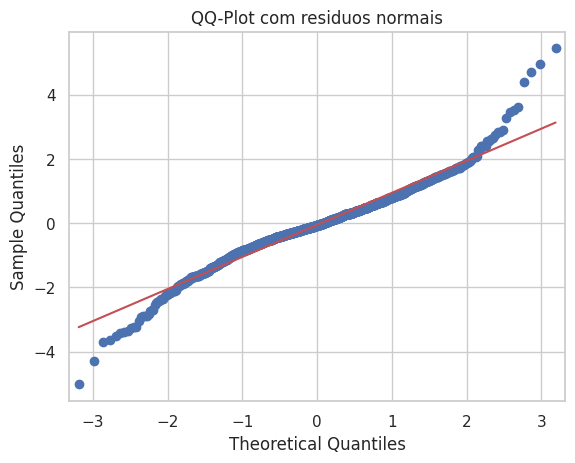

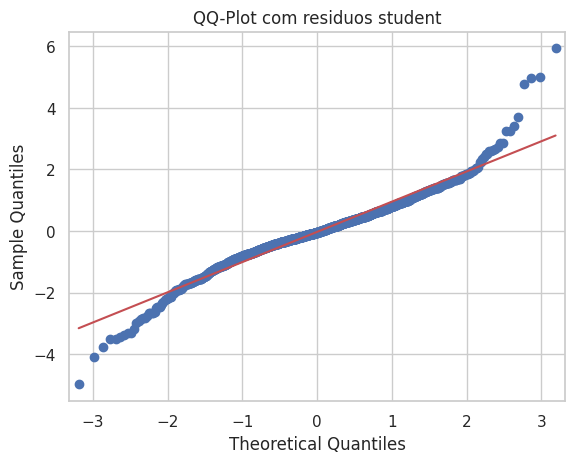

6.02219912767118 6.631171950881926 0.027389022088314723 0.08573532582457007


In [30]:
## QQ Plot / Jarque-Beera
sm.qqplot(resids_normal, line = 's')
plt.title("QQ-Plot com residuos normais")
plt.show()

sm.qqplot(resids_student, line = 's')
plt.title("QQ-Plot com residuos student")
plt.show()

print(kurtosis(resids_normal,fisher = False),kurtosis(resids_student,fisher = False),skew(resids_normal),skew(resids_student))

Observamos pelos gráficos QQ-Plot acima que para ambos os modelos os residuos seguem uma distribuição aproximadamente normal, ocorrendo um descolamento apenas nos quantis mais extremos devido a um excesso de curtose. Observamos também que esse efeito é um poubo maix acentuado para o caso dos residuos student. Esses resultados estão de acordo com a hispoteses assumidas para ambos os modelos.

# Tarefa 3: Backtesting

In [31]:
def kupiec(valores,alfa):
    # retorna o P-Valor associado a hipotese nula de que o VaR calculado atende ao
    # requisito do valor do quantil alfa, ou seja, não temos um excesso de violações.

    n1 = np.sum(valores)
    n0 = len(valores) - n1

    tau = n1/(n0+n1)
    LTau = tau**n1*(1-tau)**n0
    LAlfa = alfa**n1*(1-alfa)**n0

    x = 2*np.log(LTau/LAlfa)
    return 1 - scipy.stats.chi2.cdf(x, 1)

In [32]:
def christoffersen(valores,alfa):
    # retorna o P-Valor associado a hipotese nula de que o VaR calculado atende ao
    # requisito do valor do quantil alfa, ou seja, não temos um excesso de violações.

    n1 = np.sum(valores)
    n0 = len(valores) - n1

    n11 = np.sum( valores[:-1] &  valores[1:]) #Transição true-true
    n10 = np.sum( valores[:-1] & ~valores[1:]) #Transição true-false
    n01 = np.sum(~valores[:-1] &  valores[1:]) #Transição false-true
    n00 = np.sum(~valores[:-1] & ~valores[1:]) #Transição false-false

    tau = np.zeros([2,2])

    if(n00+n01 != 0):
        tau[0,0] = n00/(n00+n01)
        tau[0,1] = n01/(n00+n01)
    else:
        tau[0,0] = 0
        tau[0,1] = 0

    if(n11+n10 != 0):
        tau[1,0] = n10/(n10+n11)
        tau[1,1] = n11/(n10+n11)
    else:
        tau[1,0] = 0
        tau[1,1] = 0

    LAlfa = (1-alfa)**n0*alfa**n1
    LTau = (1-tau[0,1])**n00*tau[0,1]**n01*(1-tau[1,1])**n10*tau[1,1]**n11

    x = 2*np.log(LTau/LAlfa)
    return 1 - scipy.stats.chi2.cdf(x, 1)

In [33]:
forecast_normal = garch_normal.forecast()
forecast_student = garch_student.forecast()

In [34]:
forecast_normal.variance,forecast_student.variance

(                 h.1
 Date                
 2021-07-08  2.012942
 2021-07-09  1.969423
 2021-07-12  1.864356
 2021-07-13  1.692911
 2021-07-14  1.886635
 ...              ...
 2023-11-24  1.281960
 2023-11-27  1.284457
 2023-11-28  1.196360
 2023-11-29  1.162982
 2023-11-30  1.157863
 
 [605 rows x 1 columns],
                  h.1
 Date                
 2021-07-08  1.927466
 2021-07-09  1.913722
 2021-07-12  1.757718
 2021-07-13  1.634165
 2021-07-14  2.234763
 ...              ...
 2023-11-24  1.333951
 2023-11-27  1.234423
 2023-11-28  1.144992
 2023-11-29  1.145591
 2023-11-30  1.070744
 
 [605 rows x 1 columns])

In [35]:
quantil = scipy.stats.norm.ppf([0.01, 0.05]) # Normal(0,1) One-Tail at 1%, 5%

var_ajustado_n5 = forecast_normal.mean + np.sqrt(forecast_normal.variance)*quantil[1]
var_ajustado_n1 = forecast_normal.mean + np.sqrt(forecast_normal.variance)*quantil[0]

var_ajustado_t5 = forecast_student.mean + np.sqrt(forecast_student.variance)*quantil[1]
var_ajustado_t1 = forecast_student.mean + np.sqrt(forecast_student.variance)*quantil[0]

### Modelo Normal

604 29 4


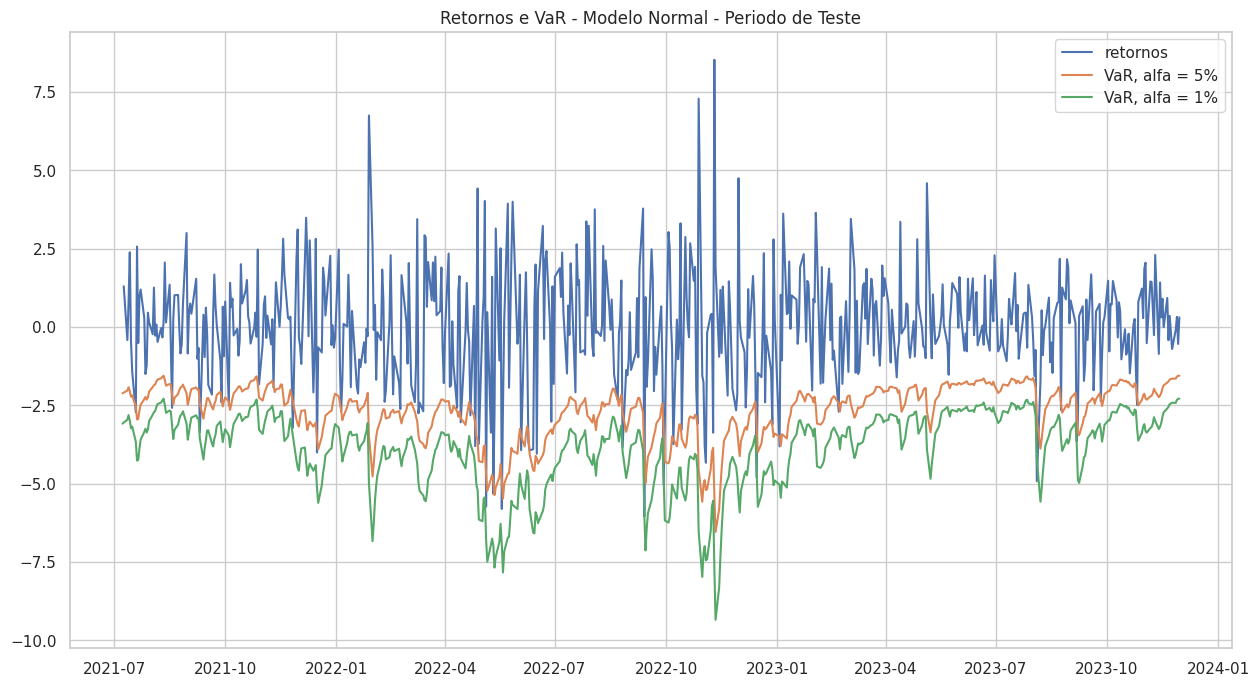

In [36]:
res_n5 = var_ajustado_n5.to_numpy().flatten()>=log_retornos[index-1:].to_numpy().flatten()
res_n1 = var_ajustado_n1.to_numpy().flatten()>=log_retornos[index-1:].to_numpy().flatten()
print(len(log_retornos[index:]),np.sum(res_n5),np.sum(res_n1))

plt.figure(figsize = (15,8))
plt.plot(log_retornos[index:],label="retornos")
plt.plot(var_ajustado_n5,label="VaR, alfa = 5%")
plt.plot(var_ajustado_n1,label="VaR, alfa = 1%")
plt.title("Retornos e VaR - Modelo Normal - Periodo de Teste")
plt.legend()
#plt.plot(garch_student.conditional_volatility, c="tab:orange")
plt.show()

In [37]:
d = {"Kupiec 5%":kupiec(res_n5,0.05),"Kupiec 1%":kupiec(res_n1,0.01),"Christoffersen 5%":christoffersen(res_n5,0.05),"Christoffersen 1%":christoffersen(res_n1,0.01)}
backtest_df = pd.DataFrame(d,["GARCH Normal"])

### Modelo Student

604 13 0


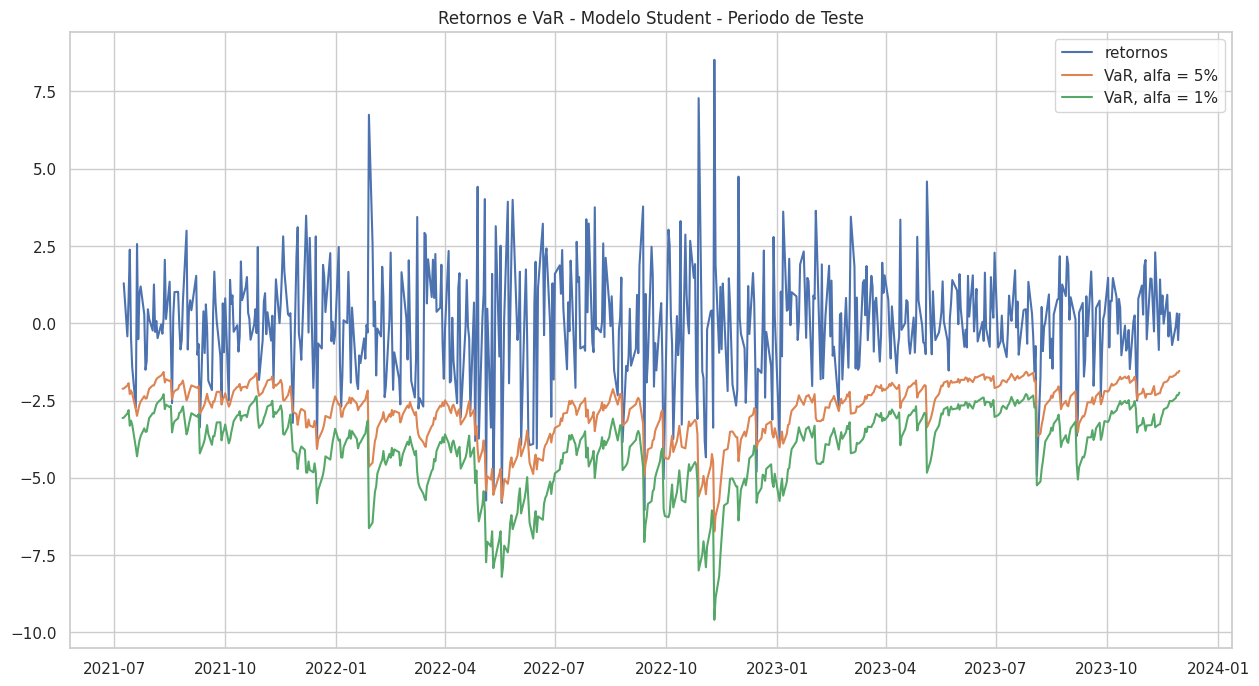

In [38]:
res_t5 = var_ajustado_t5.to_numpy().flatten()>=log_retornos[index-1:].to_numpy().flatten()
res_t1 = var_ajustado_t1.to_numpy().flatten()>=log_retornos[index-1:].to_numpy().flatten()
print(len(log_retornos[index:]),np.sum(res_t5),np.sum(res_t1))

plt.figure(figsize = (15,8))
plt.plot(log_retornos[index:],label="retornos")
plt.plot(var_ajustado_t5,label="VaR, alfa = 5%")
plt.plot(var_ajustado_t1,label="VaR, alfa = 1%")
plt.title("Retornos e VaR - Modelo Student - Periodo de Teste")
plt.legend()
#plt.plot(garch_student.conditional_volatility, c="tab:orange")
plt.show()

In [39]:
d = {"Kupiec 5%":kupiec(res_t5,0.05),"Kupiec 1%":kupiec(res_t1,0.01),"Christoffersen 5%":christoffersen(res_t5,0.05),"Christoffersen 1%":christoffersen(res_t1,0.01)}
backtest_df = pd.concat([backtest_df,pd.DataFrame(d,["GARCH Student"])])

### Resultados

Aceitamos a hipotese nula de que o número de violações corresponde de maneira adequada ao quantil de risco escolhido para o VaR quando o P-valor associado é de 0.05 ou maior.

In [40]:
backtest_df

,Kupiec 5%,Kupiec 1%,Christoffersen 5%,Christoffersen 1%
GARCH Normal,0.814422,0.372023,0.079266,0.352759
GARCH Student,0.000303,0.000488,0.000218,0.000488


Como o menor P-valor para o modelo da GARCH Normal foi de 0.079 no caso de alfa=5% com o tste Christoffersen, é possivel afirmar com segurança que a hipotese nula deve ser aceita e que o modelo é adequado

Os P-Valores próximos de 0 obtidos para a GARCH Student indicam que a hipotese nula deve ser rejeitada e que o modelo não gerou um VaR adequado para a serie. De fato, observando o gráfico anterior é possivel constatar que o VaR estimado é excessivamente grande, com um numero de violações extremamente pequeno e muito menores do que o esperado.

# Tarefa 4: VaR para T+1

In [41]:
## Previsão para T+1:
# Prevendo com horizonte = 1, logo 1 passo no futuro
prev_normal = garch_normal.forecast(start = len(log_retornos)-1, horizon = 1)
prev_student = garch_student.forecast(start = len(log_retornos)-1, horizon = 1)

In [42]:
prev_normal.mean

,h.1
Date,
2023-11-30,0.214104


In [43]:
quantil = scipy.stats.norm.ppf([0.01, 0.05])

var_normal = prev_normal.mean.to_numpy() + np.sqrt(prev_normal.variance).values * quantil

var_student = prev_student.mean.to_numpy() + np.sqrt(prev_student.variance).values * quantil

var_normal,var_student
## Consertar o dataframe
### value_at_risk = pd.DataFrame(value_at_risk, columns=['1%', '5%'], index=prev_normal.index)

(array([[-2.2891404 , -1.55582513]]), array([[-2.23995338, -1.53476522]]))

In [44]:
df_original["Close"]

Date
2015-12-01     29.334999
2015-12-02     29.070000
2015-12-03     28.799999
2015-12-04     29.757500
2015-12-07     29.570000
                 ...    
2023-11-24    189.970001
2023-11-27    189.789993
2023-11-28    190.399994
2023-11-29    189.369995
2023-11-30    189.949997
Name: Close, Length: 2014, dtype: float64

In [45]:
VaR_normal = 189.949997*5000*var_normal
VaR_normal

array([[-2174111.06424004, -1477644.88929559]])

In [46]:
prev = garch_student.forecast(start = len(log_retornos)-1)
cond_mean = prev.mean
cond_var = prev.variance

In [47]:
garch_student.params

mu          0.167276
omega       0.119081
alpha[1]    0.155509
beta[1]     0.828112
nu          4.057456
Name: params, dtype: float64

In [48]:
q = garch.distribution.ppf([0.01, 0.05], garch_student.params[4])
print(q)

[-2.6474294  -1.51192346]


In [49]:
value_at_risk = -cond_mean.values - np.sqrt(cond_var).values * q[None, :]
value_at_risk = pd.DataFrame(value_at_risk, columns=['1%', '5%'], index=cond_var.index)
value_at_risk

,1%,5%
Date,,
2023-11-30,2.572198,1.397213


In [50]:
VaR_t = 189.949997*5000*var_student
VaR_t

array([[-2127395.6864624 , -1457643.24893841]])

**Analise**:

Usualmente o GARCH-t seria preferido quando se lida com séries temporais financeiras, já que a distribuição t permite uma melhor modelagem de eventos extremos e de volatilidade condicional. Entretanto, no nosso caso foi possível observar que o modelo T foi rejeitado no Backtesting. Dessa forma, os únicos valores que poderão ser aceitos serão os valores do modelo Normal.

# Código para impressão

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [52]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Lista4.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Lista4.ipynb to pdf
[NbConvertApp] Support files will be in Lista4_files/
[NbConvertApp] Making directory ./Lista4_files
[NbConvertApp] Making directory ./Lista4_files
[NbConvertApp] Making directory ./Lista4_files
[NbConvertApp] Making directory ./Lista4_files
[NbConvertApp] Making directory ./Lista4_files
[NbConvertApp] Making directory ./Lista4_files
[NbConvertApp] Making directory ./Lista4_files
[NbConvertApp] Making directory ./Lista4_files
[NbConvertApp] Making directory ./Lista4_files
[NbConvertApp] Making directory ./Lista4_files
[NbConvertApp] Making directory ./Lista4_files
[NbConvertApp] Making directory ./Lista4_files
[NbConvertApp] Making directory ./Lista4_files
[NbConvertApp] Making directory ./Lista4_files
[NbConvertApp] Making directory ./Lista4_files
[NbConvertApp] Making directory ./Lista4_files
[NbConvertApp] Making directory ./Lista4_files
[NbConvertApp] Making directory ./Lista4_files
[NbCon